# K Nearest Neighbours

Objective: Predict banking markerting campaign  
Dataset: banking.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('banking.csv')
print(data.shape)
data.head()

(41188, 17)


,age,job,marital,education,housing,loan,contact,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,sales
0,44,blue-collar,married,basic.4y,yes,no,cellular,210,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,cellular,138,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,cellular,339,3,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,cellular,185,2,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,cellular,137,1,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Data Exploration

0    36548
1     4640
Name: sales, dtype: int64


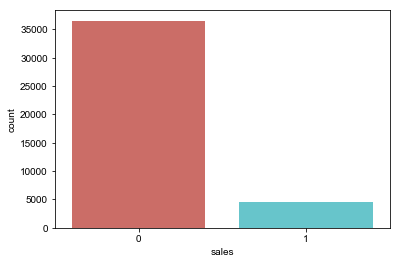

In [2]:
print(data['sales'].value_counts())  

sns.countplot(x='sales',data = data, palette='hls',order = data['sales'].value_counts().index)
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

## Convert Categorical to Numerical

In [3]:
data["job"]  = data["job"].astype('category')
data["job#"] = data["job"].cat.codes

data["marital"]  = data["marital"].astype('category')
data["marital#"] = data["marital"].cat.codes

data["education"]  = data["education"].astype('category')
data["education#"] = data["education"].cat.codes

data["housing"]  = data["housing"].astype('category')
data["housing#"] = data["housing"].cat.codes

data["loan"]  = data["loan"].astype('category')
data["loan#"] = data["loan"].cat.codes

data["contact"]  = data["contact"].astype('category')
data["contact#"] = data["contact"].cat.codes

data["poutcome"]  = data["poutcome"].astype('category')
data["poutcome#"] = data["poutcome"].cat.codes

data.head(2)

,age,job,marital,education,housing,loan,contact,duration,campaign,previous,...,euribor3m,nr_employed,sales,job#,marital#,education#,housing#,loan#,contact#,poutcome#
0,44,blue-collar,married,basic.4y,yes,no,cellular,210,1,0,...,4.963,5228.1,0,1,1,0,2,0,0,1
1,53,technician,married,unknown,no,no,cellular,138,1,0,...,4.021,5195.8,0,9,1,7,0,0,0,1


## Correlation

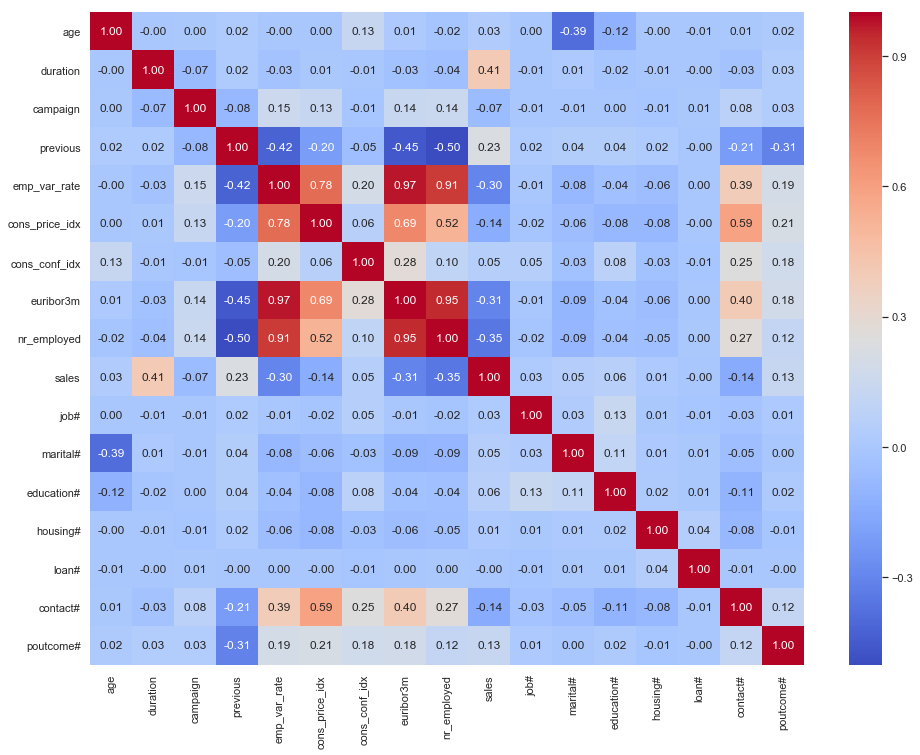

In [4]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [5]:
corr_rank = data.corr()
corr_rank["sales"].sort_values(ascending=False)

sales             1.000000
duration          0.405274
previous          0.230181
poutcome#         0.129789
education#        0.057799
cons_conf_idx     0.054878
marital#          0.046203
age               0.030399
job#              0.025122
housing#          0.011552
loan#            -0.004909
campaign         -0.066357
cons_price_idx   -0.136211
contact#         -0.144773
emp_var_rate     -0.298334
euribor3m        -0.307771
nr_employed      -0.354678
Name: sales, dtype: float64

## Data Processing and Seelction

In [6]:
X = data[['duration','previous','poutcome#','education#','cons_conf_idx','marital#','age','job#','housing#','loan#',
          'campaign','cons_price_idx','contact#','emp_var_rate','euribor3m','nr_employed']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (41188, 16)


array([[ 2.1000e+02,  0.0000e+00,  1.0000e+00,  0.0000e+00, -3.6100e+01,
         1.0000e+00,  4.4000e+01,  1.0000e+00,  2.0000e+00,  0.0000e+00,
         1.0000e+00,  9.3444e+01,  0.0000e+00,  1.4000e+00,  4.9630e+00,
         5.2281e+03],
       [ 1.3800e+02,  0.0000e+00,  1.0000e+00,  7.0000e+00, -4.2000e+01,
         1.0000e+00,  5.3000e+01,  9.0000e+00,  0.0000e+00,  0.0000e+00,
         1.0000e+00,  9.3200e+01,  0.0000e+00, -1.0000e-01,  4.0210e+00,
         5.1958e+03]])

In [7]:
y = data["sales"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (41188,)


0    0
1    0
2    1
3    0
4    1
Name: sales, dtype: int64

## Data Normalization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (41188, 16)


array([[-0.18623008, -0.34949428,  0.19262207, -1.75392459,  0.95126739,
        -0.2837415 ,  0.38152696, -0.75798228,  0.94212743, -0.45249062,
        -0.56592197, -0.2274652 , -0.75856997,  0.83906065,  0.77357519,
         0.84517009],
       [-0.46392633, -0.34949428,  0.19262207,  1.52252868, -0.32354233,
        -0.2837415 ,  1.24515746,  1.46762984, -1.08770698, -0.45249062,
        -0.56592197, -0.649003  , -0.75856997, -0.11578127,  0.23045613,
         0.39811529]])

## Split Train Test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (32950, 16) (32950,)
X TEST Set :  (8238, 16) (8238,)


## K Nearest Neighbour

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#using loop to find the best accuracy and the best k
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(np.round(mean_acc,4))

[0.8849 0.8954 0.8966 0.9013 0.9034 0.905  0.9075 0.9065 0.9068 0.9043
 0.9047 0.904  0.9053 0.904 ]


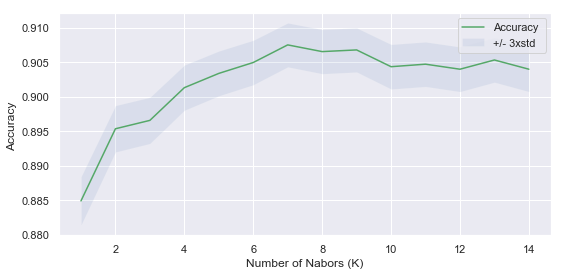

The best accuracy was 0.9075 with k= 7


In [11]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", round(mean_acc.max(),4), "with k=", mean_acc.argmax()+1) 

In [12]:
print("Train set Accuracy: ", round(metrics.accuracy_score(y_train, neigh.predict(X_train)),4))
print("Test set Accuracy : ", round(metrics.accuracy_score(y_test, yhat),4))

Train set Accuracy:  0.9135
Test set Accuracy :  0.904


## Test Prediction

In [13]:
df_pred1 = data[data.index == 2]
df_pred2 = data[data.index == 3]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,previous,...,euribor3m,nr_employed,sales,job#,marital#,education#,housing#,loan#,contact#,poutcome#
2,28,management,single,university.degree,yes,no,cellular,339,3,2,...,0.729,4991.6,1,4,2,6,2,0,0,2
3,39,services,married,high.school,no,no,cellular,185,2,0,...,1.405,5099.1,0,7,1,3,0,0,0,1


In [14]:
Xp = df_pred[['duration','previous','poutcome#','education#','cons_conf_idx','marital#','age','job#','housing#','loan#',
          'campaign','cons_price_idx','contact#','emp_var_rate','euribor3m','nr_employed']].values
yp = df_pred["sales"]
Xp = scaler.transform(Xp)

pred = neigh.predict(Xp)
pred

array([1, 0], dtype=int64)